In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Dataset/baseline_data.csv")
test = pd.read_csv("Dataset/baseline_data_test.csv")

In [3]:
np.sort(train["id_jalan"].unique())

array([     1210,   3688059,   3691841,   4004732,   4060819,   4061596,
         4898588,   8504977,  22932408,  24704286,  26785612,  40044423,
        47010584,  50841260,  66924592,  97453767, 142479648, 150783571,
       182210371, 691007296], dtype=int64)

In [4]:
def extract_first_digit(number):
    number_str = str(number)
    first_digit = number_str[0]
    return int(first_digit)

def extract_last_digit(number):
    number_str = str(number)
    last_digit = number_str[-1]
    return int(last_digit)

def extract_last_three_digits(number):
    number_str = str(number)
    last_three_digits = number_str[-3:]
    return int(last_three_digits)

def extract_last_two_digits(number):
    number_str = str(number)
    last_two_digits = number_str[-2:]
    return int(last_two_digits)

# Apply the extraction functions to create new columns
train['id_jalan_first'] = train['id_jalan'].apply(extract_first_digit)
train['id_jalan_last'] = train['id_jalan'].apply(extract_last_digit)
train['id_titik_mulai_last3'] = train['id_titik_mulai'].apply(extract_last_three_digits)
train['id_titik_akhir_last3'] = train['id_titik_akhir'].apply(extract_last_three_digits)
train['id_titik_mulai_last2'] = train['id_titik_mulai'].apply(extract_last_two_digits)
train['id_titik_akhir_last2'] = train['id_titik_akhir'].apply(extract_last_two_digits)

test['id_jalan_first'] = test['id_jalan'].apply(extract_first_digit)
test['id_jalan_last'] = test['id_jalan'].apply(extract_last_digit)
test['id_titik_mulai_last3'] = test['id_titik_mulai'].apply(extract_last_three_digits)
test['id_titik_akhir_last3'] = test['id_titik_akhir'].apply(extract_last_three_digits)
test['id_titik_mulai_last2'] = test['id_titik_mulai'].apply(extract_last_two_digits)
test['id_titik_akhir_last2'] = test['id_titik_akhir'].apply(extract_last_two_digits)

<AxesSubplot:xlabel='id_jalan_first', ylabel='rerata_kecepatan'>

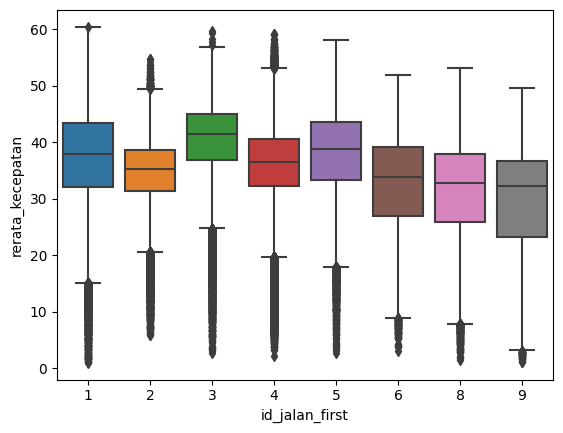

In [5]:
sns.boxplot(data=train, x="id_jalan_first", y="rerata_kecepatan")

Text(0.5, 1.0, 'Distribusi kecepatan id_titik_akhir_last2')

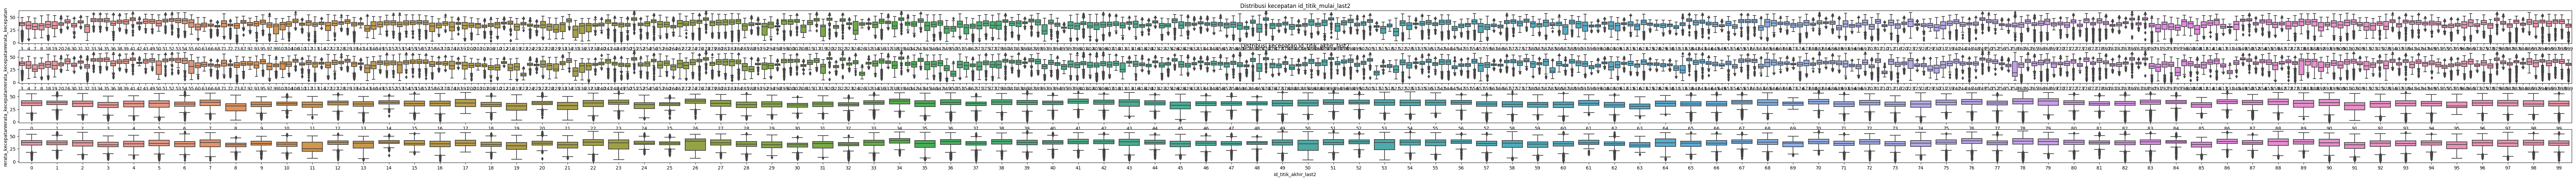

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(100, 6))

sns.boxplot(data=train, x="id_titik_mulai_last3", y="rerata_kecepatan", ax=axes[0])
axes[0].set_title("Distribusi kecepatan id_titik_mulai_last3")

sns.boxplot(data=train, x="id_titik_akhir_last3", y="rerata_kecepatan", ax=axes[1])
axes[1].set_title("Distribusi kecepatan id_titik_akhir_last3")

sns.boxplot(data=train, x="id_titik_mulai_last2", y="rerata_kecepatan", ax=axes[2])
axes[0].set_title("Distribusi kecepatan id_titik_mulai_last2")

sns.boxplot(data=train, x="id_titik_akhir_last2", y="rerata_kecepatan", ax=axes[3])
axes[1].set_title("Distribusi kecepatan id_titik_akhir_last2")

In [7]:
train.isna().sum()[train.isna().sum()>0]

node_awal_ways     15106
node_akhir_ways    14909
dtype: int64

In [8]:
test.isna().sum()[test.isna().sum()>0]

node_awal_ways     4827
node_akhir_ways    4765
dtype: int64

In [9]:
mapping = {
    1: "Saturday",
    2: "Sunday",
    3: "Monday",
    4: "Tuesday",
    5: "Wednesday",
    6: "Thursday",
    7: "Friday",
    8: "Saturday",
    9: "Sunday",
    10: "Monday",
    11: "Tuesday",
    12: "Wednesday",
    13: "Thursday",
    14: "Friday",
    15: "Saturday",
    16: "Sunday",
    17: "Monday",
    18: "Tuesday",
    19: "Wednesday",
    20: "Thursday",
    21: "Friday",
    22: "Saturday",
    23: "Sunday",
    24: "Monday",
    25: "Tuesday",
    26: "Wednesday",
    27: "Thursday",
    28: "Friday",
    29: "Saturday"
}

train["Day"] = train["Date"].map(mapping)
test["Day"] = test["Date"].map(mapping)

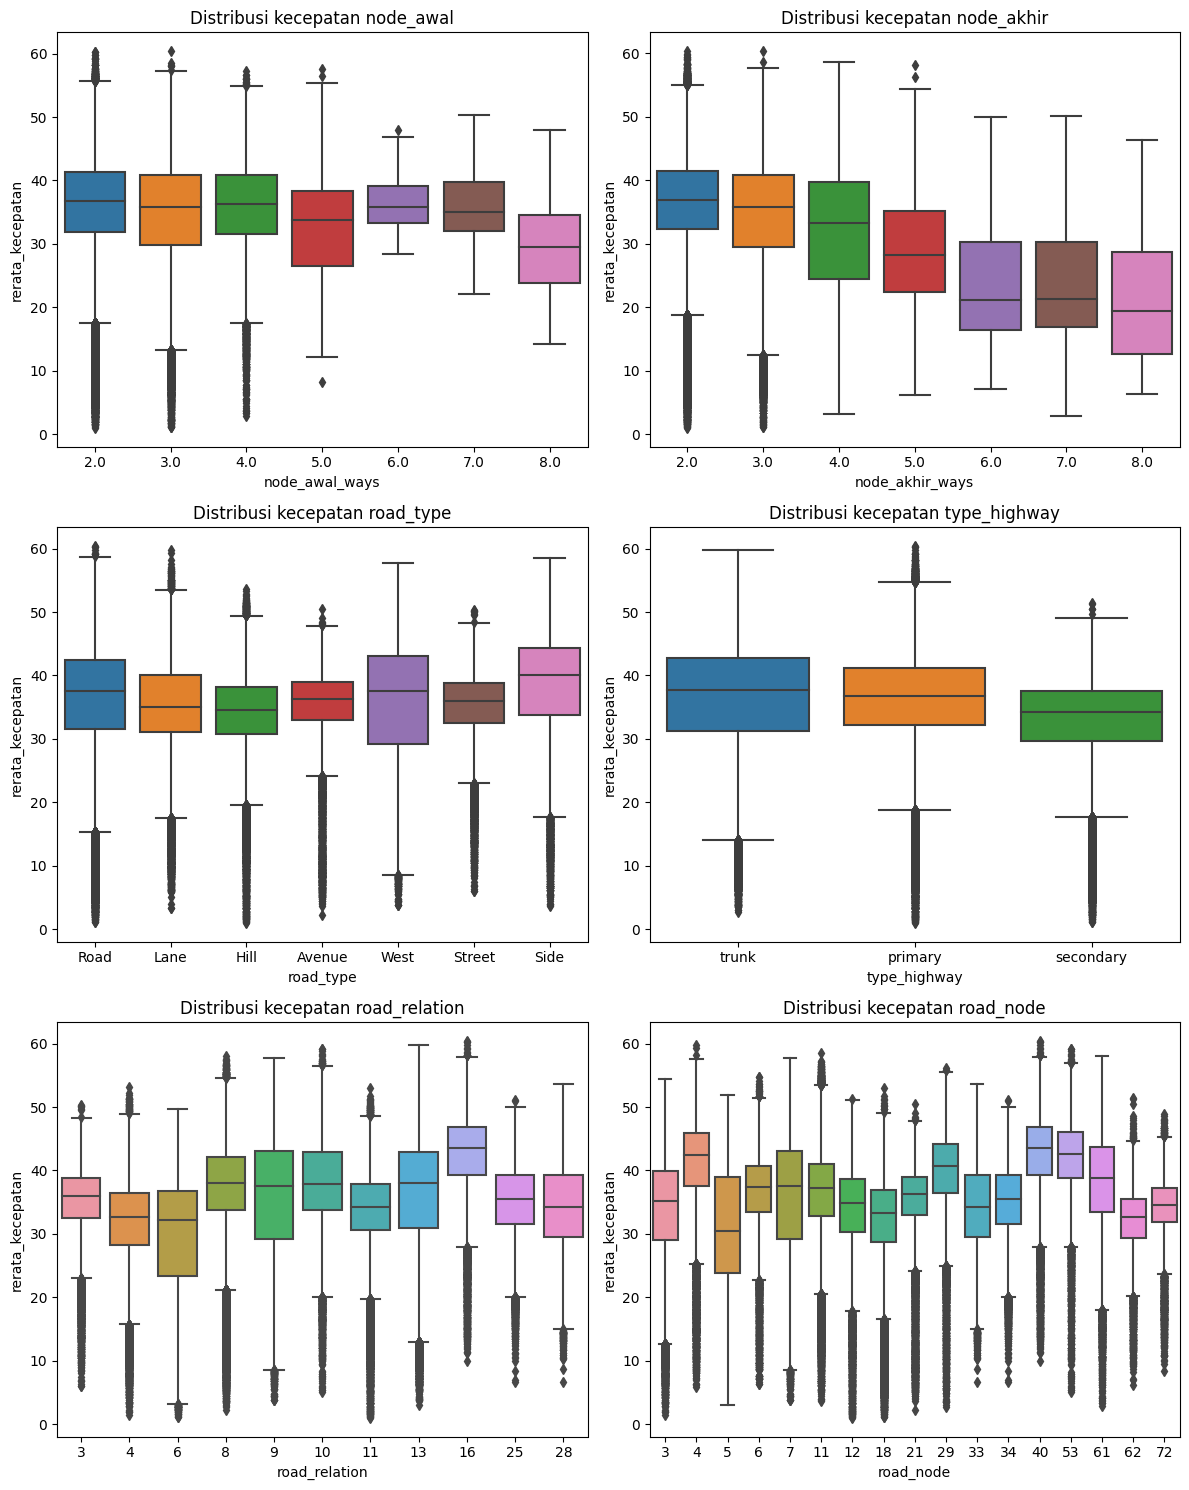

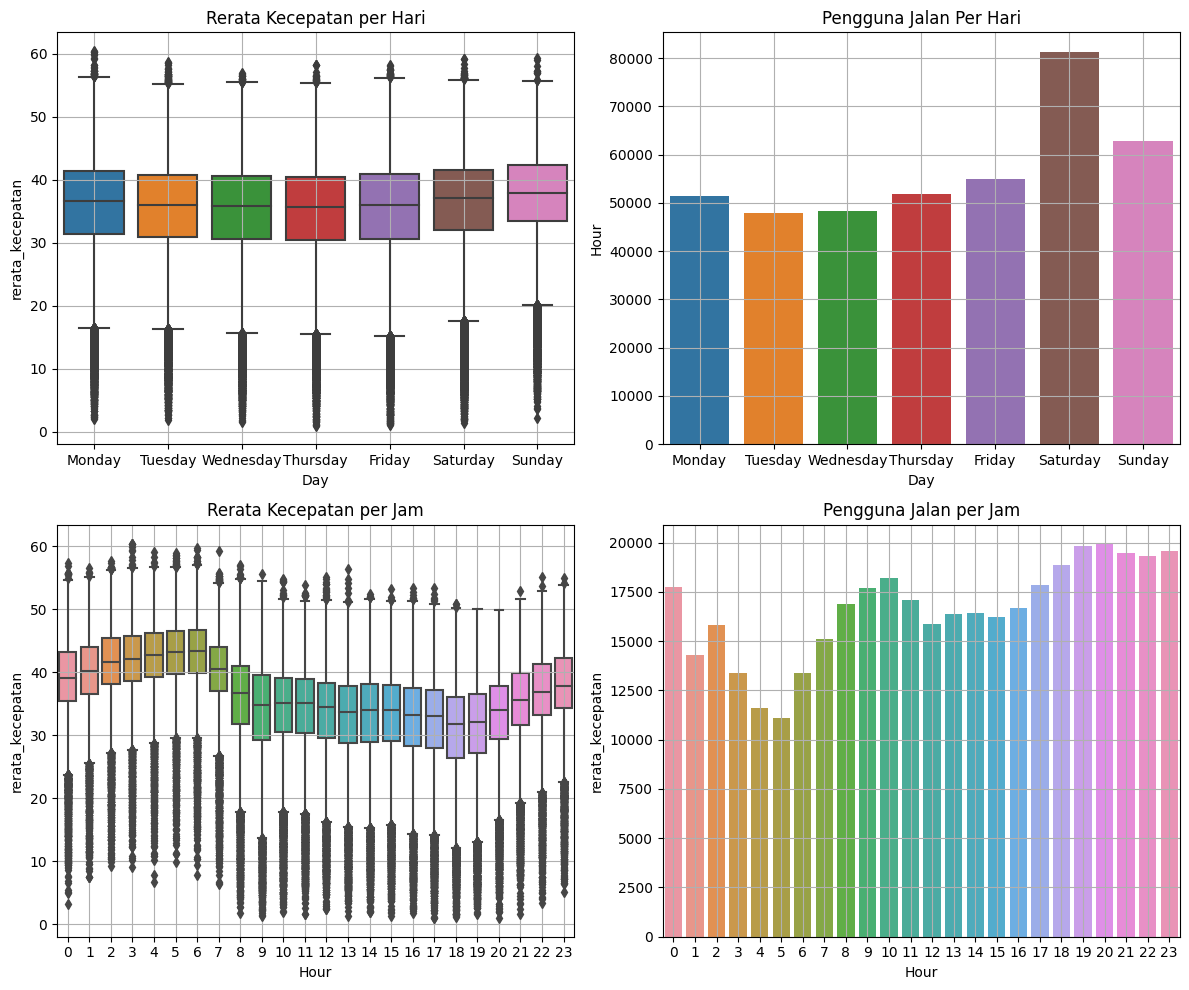

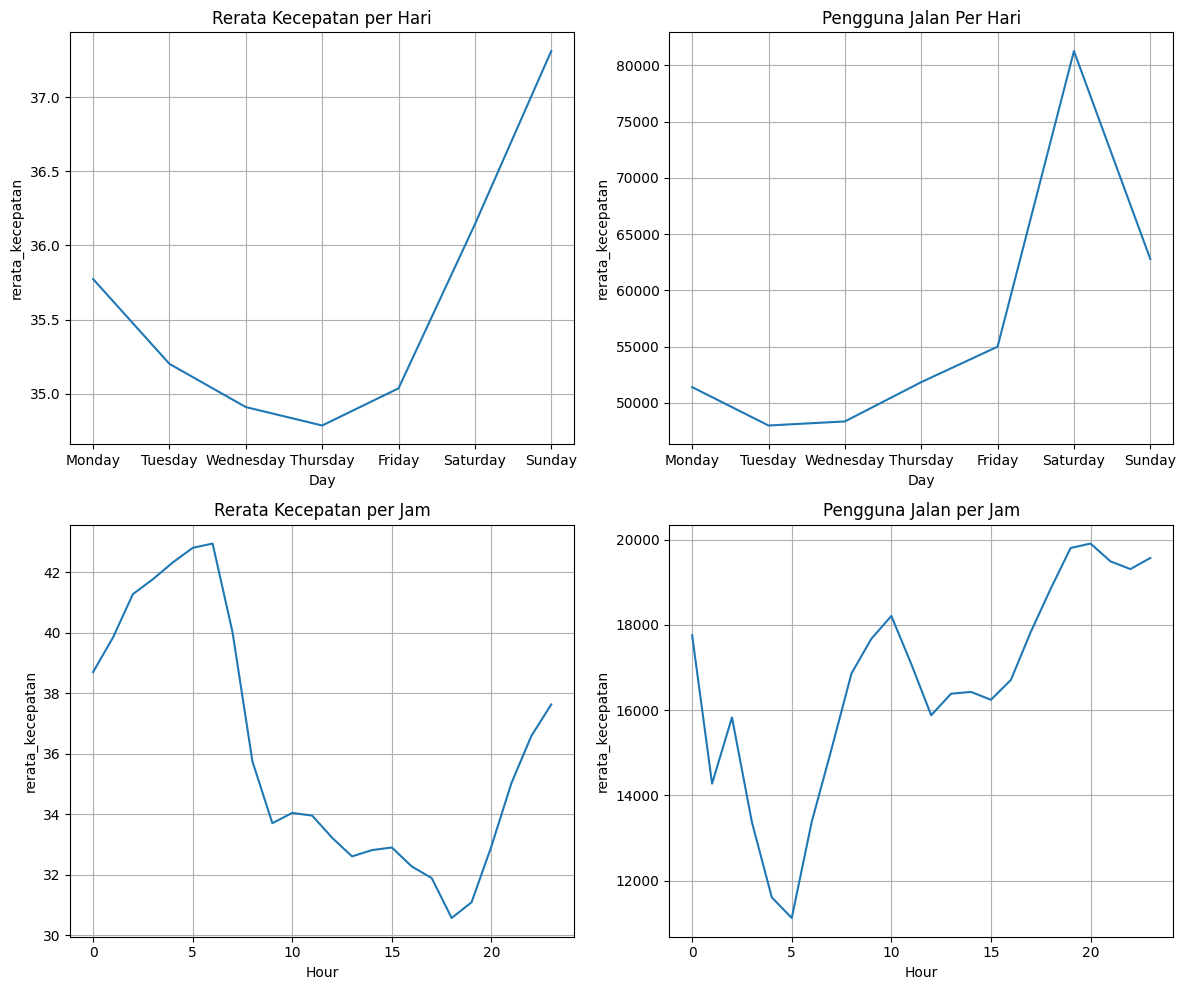

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Subplot 1: Distribusi kecepatan node_awal
sns.boxplot(data=train, x="node_awal_ways", y="rerata_kecepatan", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi kecepatan node_awal")

# Subplot 2: Distribusi kecepatan node_akhir
sns.boxplot(data=train, x="node_akhir_ways", y="rerata_kecepatan", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi kecepatan node_akhir")

# Subplot 3: Distribusi kecepatan road_type
sns.boxplot(data=train, x="road_type", y="rerata_kecepatan", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi kecepatan road_type")

# Subplot 4: Distribusi kecepatan type_highway
sns.boxplot(data=train, x="type_highway", y="rerata_kecepatan", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi kecepatan type_highway")

# Subplot 5: Distribusi kecepatan road_relation
sns.boxplot(data=train, x="road_relation", y="rerata_kecepatan", ax=axes[2, 0])
axes[2, 0].set_title("Distribusi kecepatan road_relation")

# Subplot 6: Distribusi kecepatan road_node
sns.boxplot(data=train, x="road_node", y="rerata_kecepatan", ax=axes[2, 1])
axes[2, 1].set_title("Distribusi kecepatan road_node")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data = train.groupby("Day").agg({"rerata_kecepatan": "mean", "Hour": "count"})
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_grouped_data = grouped_data.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.boxplot(data=train, x="Day", y="rerata_kecepatan", order=desired_order)
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.barplot(data=sorted_grouped_data, x=sorted_grouped_data.index, y="Hour", order=desired_order)
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.boxplot(data=train, x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.barplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data_mean = train.groupby("Day").mean()
grouped_data_count = train.groupby("Day").count()

# Step 2: Define the desired order of days
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Step 3: Sort the index using the desired order
sorted_grouped_data_mean = grouped_data_mean.reindex(desired_order)
sorted_grouped_data_count = grouped_data_count.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.lineplot(data=sorted_grouped_data_mean, x=sorted_grouped_data_mean.index, y="rerata_kecepatan")
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.lineplot(data=sorted_grouped_data_count, x=sorted_grouped_data_count.index, y="rerata_kecepatan")
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.lineplot(data=train.groupby("Hour").mean().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.lineplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

In [11]:
train['id_jalan_id_titik_mulai_id_titik_akhir'] = train.apply(lambda row: f"{int(row['id_jalan'])}_{int(row['id_titik_mulai'])}_{int(row['id_titik_akhir'])}", axis=1)
test['id_jalan_id_titik_mulai_id_titik_akhir'] = test.apply(lambda row: f"{int(row['id_jalan'])}_{int(row['id_titik_mulai'])}_{int(row['id_titik_akhir'])}", axis=1)

train['id_titik_mulai_id_titik_akhir'] = train["id_titik_mulai"] - train["id_titik_akhir"]
test['id_titik_mulai_id_titik_akhir'] = test["id_titik_mulai"] - test["id_titik_akhir"]

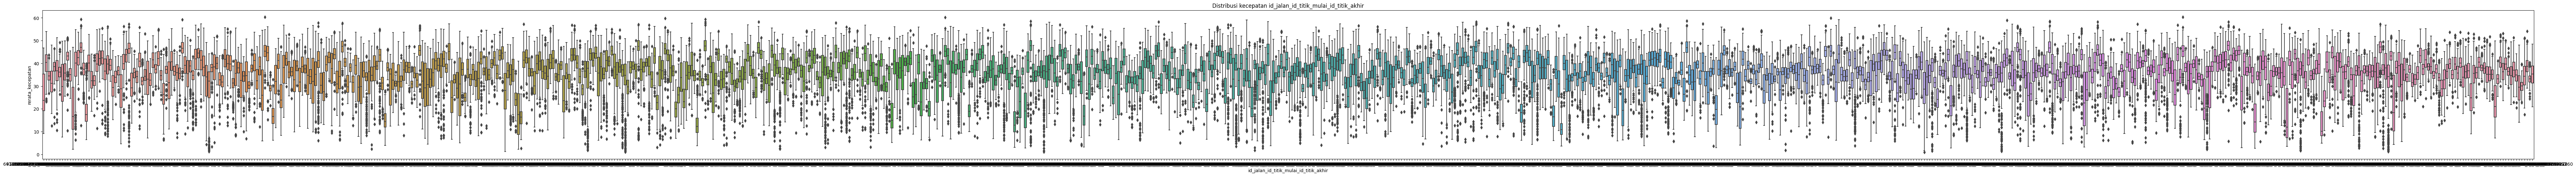

In [12]:
plt.figure(figsize=(100,6))
plt.title("Distribusi kecepatan id_jalan_id_titik_mulai_id_titik_akhir")
sns.boxplot(data=train, x="id_jalan_id_titik_mulai_id_titik_akhir", y="rerata_kecepatan")
plt.show()

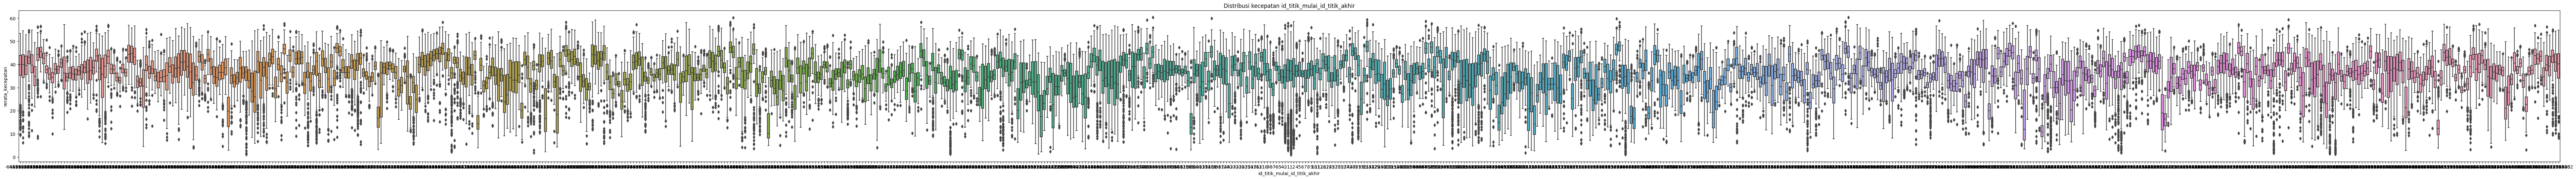

In [13]:
plt.figure(figsize=(100,6))
plt.title("Distribusi kecepatan id_titik_mulai_id_titik_akhir")
sns.boxplot(data=train, x="id_titik_mulai_id_titik_akhir", y="rerata_kecepatan")
plt.show()

In [14]:
train.head()

,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,...,type_highway,id_jalan_first,id_jalan_last,id_titik_mulai_last3,id_titik_akhir_last3,id_titik_mulai_last2,id_titik_akhir_last2,Day,id_jalan_id_titik_mulai_id_titik_akhir,id_titik_mulai_id_titik_akhir
0,691007296,21390008,1425033102,29.126,1,1,Road,3.0,3.0,13,...,trunk,6,6,8,102,8,2,Saturday,691007296_21390008_1425033102,-1403643094
1,47010584,1677092762,579493410,46.576,1,1,Road,3.0,2.0,10,...,primary,4,4,762,410,62,10,Saturday,47010584_1677092762_579493410,1097599352
2,22932408,26486694,1930267566,36.587,1,1,Lane,3.0,2.0,4,...,secondary,2,8,694,566,94,66,Saturday,22932408_26486694_1930267566,-1903780872
3,142479648,1111592522,3775231113,34.063,1,1,Hill,2.0,2.0,11,...,primary,1,8,522,113,22,13,Saturday,142479648_1111592522_3775231113,-2663638591
4,8504977,5940503398,5940503394,38.336,1,1,Road,2.0,2.0,4,...,primary,8,7,398,394,98,94,Saturday,8504977_5940503398_5940503394,4


In [15]:
test.head()

,id,id_jalan,id_titik_mulai,id_titik_akhir,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,...,type_highway,id_jalan_first,id_jalan_last,id_titik_mulai_last3,id_titik_akhir_last3,id_titik_mulai_last2,id_titik_akhir_last2,Day,id_jalan_id_titik_mulai_id_titik_akhir,id_titik_mulai_id_titik_akhir
0,0,4004732,32046542,6454026544,23,0,West,3.0,3.0,9,...,trunk,4,2,542,544,42,44,Sunday,4004732_32046542_6454026544,-6421980002
1,1,182210371,1314925464,1314925496,23,0,Side,2.0,2.0,13,...,trunk,1,1,464,496,64,96,Sunday,182210371_1314925464_1314925496,-32
2,2,22932408,1482086782,26481020,23,0,Lane,2.0,2.0,4,...,secondary,2,8,782,20,82,20,Sunday,22932408_1482086782_26481020,1455605762
3,3,182210371,3892883,267337489,23,0,Side,2.0,2.0,13,...,trunk,1,1,883,489,83,89,Sunday,182210371_3892883_267337489,-263444606
4,4,66924592,266041030,2592978110,23,0,Road,2.0,3.0,25,...,trunk,6,2,30,110,30,10,Sunday,66924592_266041030_2592978110,-2326937080


In [135]:
# train.to_csv("Dataset/train_ext_fe.csv", index=False)

In [16]:
# test.to_csv("Dataset/test_ext_fe.csv", index=False)